# `porosimetry`
This is essentially a drainage algorithm but returns a list of invasion sizes which can be analzyed to extract the pore size distribution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

The arguments and their defaults are:

In [2]:
import inspect
inspect.signature(ps.filters.porosimetry)

<Signature (im, sizes=25, inlets=None, access_limited=True, mode='hybrid', divs=1)>

## `im`
The function works on 2D and 3D images:

  0%|          | 0/25 [00:00<?, ?it/s]

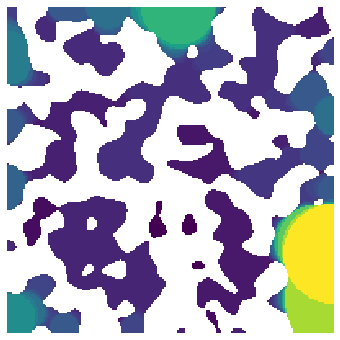

In [3]:
im = ps.generators.blobs(shape=[200, 200])
sizes = ps.filters.porosimetry(im=im)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(sizes/im, origin='lower', interpolation='none')
ax.axis(False);

A cumulative histogram of the voxel values is analogous to a porosimetry experiment:

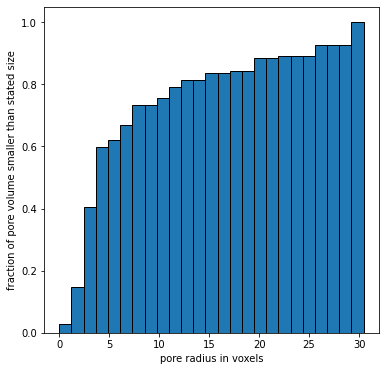

In [4]:
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.hist(sizes[im], bins=25, cumulative=True, edgecolor='k', density=True)
ax.set_xlabel('pore radius in voxels')
ax.set_ylabel('fraction of pore volume smaller than stated size');

## `sizes`
The number of bins to use, or a list of actual bins to use:

  0%|          | 0/5 [00:00<?, ?it/s]

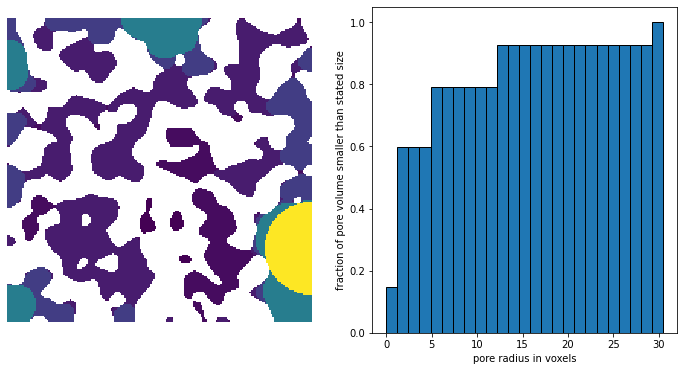

In [5]:
sizes = ps.filters.porosimetry(im=im, sizes=5)
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(sizes/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].hist(sizes[im], bins=25, cumulative=True, edgecolor='k', density=True)
ax[1].set_xlabel('pore radius in voxels')
ax[1].set_ylabel('fraction of pore volume smaller than stated size');

## `inlets`
By default the invading fluid enters from all sizes (typical of a porosimetry experiment), but this can be controlled by specifying inlets:

  0%|          | 0/25 [00:00<?, ?it/s]

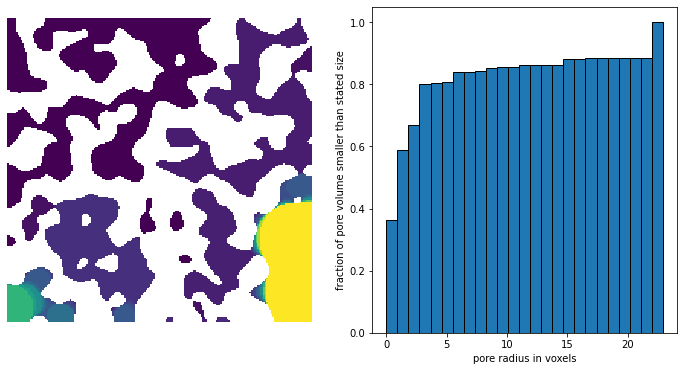

In [6]:
inlets = np.zeros_like(im)
inlets[0, ...] = True
sizes = ps.filters.porosimetry(im=im, inlets=inlets)
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(sizes/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].hist(sizes[im], bins=25, cumulative=True, edgecolor='k', density=True)
ax[1].set_xlabel('pore radius in voxels')
ax[1].set_ylabel('fraction of pore volume smaller than stated size');

## `access limited`
If ``True`` (default) then the invading fluid can only enter from the edges of the image (or ``inlets``).  If set to ``False`` then *fluid* will enter into the largest possible voids first regardless of physical connectivity.  Note that ``access_limited=False`` is identical to use the ``local_thickness`` filter.

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

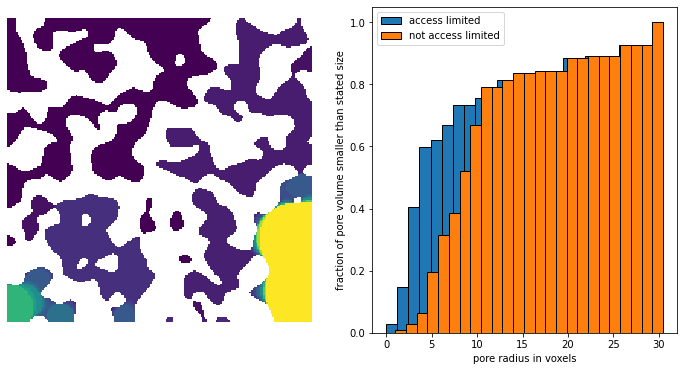

In [7]:
sizes1 = ps.filters.porosimetry(im=im, access_limited=False)
sizes2 = ps.filters.porosimetry(im=im, access_limited=True)
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(sizes/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].hist(sizes2[im], bins=25, cumulative=True, edgecolor='k', density=True, label='access limited')
ax[1].hist(sizes1[im], bins=25, cumulative=True, edgecolor='k', density=True, label='not access limited')
ax[1].set_xlabel('pore radius in voxels')
ax[1].set_ylabel('fraction of pore volume smaller than stated size')
ax[1].legend();

As can be seen the case with access limitations appears to have smaller pores, which is because the invading fluid cannot reach the large pores that are shielded by smaller ones, so their volume gets attributed to the smaller voids.

## `mode`
This controls which method is used.  The default is a 'hybrid' which uses a the threshold of a distance transform to perform an erosion, then fft-based dilation to generate spheres.  Other options are `dt` which uses a distance transform for both steps, or 'mio' which uses morphological operations for both steps. The selected method will affect the speed, but this depends on the computer being used.  All results should be exactly the same, and this is ensured in a unit test:

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

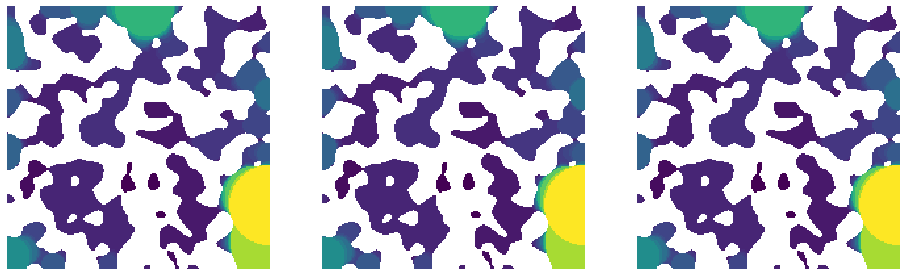

In [8]:
sizes1 = ps.filters.porosimetry(im=im, mode='dt')
sizes2 = ps.filters.porosimetry(im=im, mode='hybrid')
sizes3 = ps.filters.porosimetry(im=im, mode='mio')
fig, ax = plt.subplots(1, 3, figsize=[16, 6])
ax[0].imshow(sizes1/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(sizes2/im, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(sizes3/im, origin='lower', interpolation='none')
ax[2].axis(False);

## `divs`
Allows the fucntion to run in parallel by subdiving the image into the given number of division, either a scalar or a list for each axis.  The result will be identical but should be faster on computers with many cores.

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

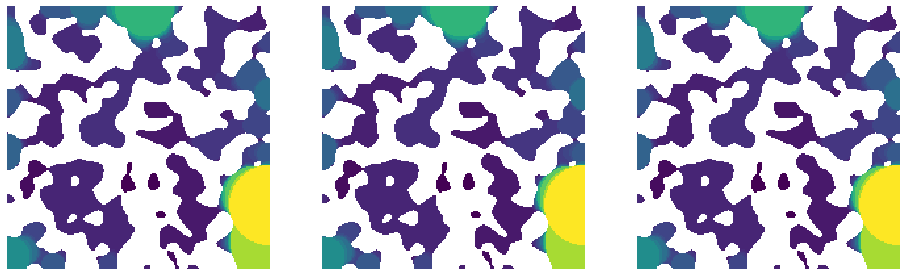

In [9]:
sizes1 = ps.filters.porosimetry(im=im, divs=1)
sizes2 = ps.filters.porosimetry(im=im, divs=[2, 1])
sizes3 = ps.filters.porosimetry(im=im, divs=3)
fig, ax = plt.subplots(1, 3, figsize=[16, 6])
ax[0].imshow(sizes1/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(sizes2/im, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(sizes3/im, origin='lower', interpolation='none')
ax[2].axis(False);